In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [2]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('WhatsApp Chat with 2018-2022 IT-B (1).txt','r',encoding='utf-8')

data = f.read()



In [3]:
dummy = data.split('\n')
dummy

['16/08/18, 20:09 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '16/08/18, 20:09 - Chinmayee created group "AGI OFFICIAL@IT 2018-22"',
 '16/08/18, 20:09 - Chinmayee added you',
 '16/08/18, 20:09 - Chinmayee: Hello this is official grup',
 '16/08/18, 20:10 - Jagss: Chusinam leaaa',
 '16/08/18, 20:10 - +91 6309 604 570: Admin cheyyi',
 '16/08/18, 20:10 - +91 6309 604 570: First',
 '16/08/18, 20:10 - Kalyan: Kkkk',
 '16/08/18, 20:10 - Chinmayee: No msg anything except studies',
 '16/08/18, 20:10 - Chinmayee: Hello sirs kuda unarru',
 '16/08/18, 20:10 - Chinmayee: Chusi matladu',
 "16/08/18, 20:10 - You're now an admin",
 '16/08/18, 20:11 - Jagss: Adhea kadha cheppindhiii',
 '16/08/18, 20:11 - Chinmayee added Abhiramitb and S*2',
 '16/08/18, 20:30 - Meet: Nc job',
 '16/08/18, 20:38 - +91 91331 12884 left',
 '16/08/18, 20:54 - Harifriend changed the subject from "AGI OFFICIAL@IT 2018-22" to "O

In [4]:
'''
Example for dry run : '16/08/18, 20:09 - '

\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s

the first part "d{1,2}" this means here we can have one or 2 digits
then after we have "/"
then after we have "d{1,2}" again,same we can have one or 2 digits
then after we have "/"
then after we have "d{2,4}" here we check for 2 or more digits
then we have a space represented as "\s"
then we have hour representation it can take either one or 2 digits 
then we have a seperator ":" 
and the pattern repeats so on..

'''

# username and message in different col

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern,data)[1:]
print(len(messages))

## extracting dates as well in different col

dates = re.findall(pattern,data)
print(len(dates))

9203
9203


In [5]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis

string = '16/08/18, 20:09 - '
string = string.split(',')
date,time = string[0],string[1]
time = time.split('-')
time = time[0].strip()
print(date+" and "+time)

16/08/18 and 20:09


In [6]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time




In [7]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-...",16/08/18 20:09
2,Chinmayee added you\n,16/08/18 20:09
3,Chinmayee: Hello this is official grup\n,16/08/18 20:09
4,Jagss: Chusinam leaaa\n,16/08/18 20:10


In [8]:
df['user_messages']

0       Messages and calls are end-to-end encrypted. N...
1       Chinmayee created group "AGI OFFICIAL@IT 2018-...
2                                   Chinmayee added you\n
3                Chinmayee: Hello this is official grup\n
4                                 Jagss: Chusinam leaaa\n
                              ...                        
9198    +91 79950 77079: 12B1 - registration Completed...
9199    Asha Ma'am: 1275 and 1288 do respond please .....
9200                           Manoj: 75 registered mam\n
9201                              +91 6304 605 703 left\n
9202    Nagalakshmi Ma'am 🐍💲: Dear  students,\nGood mo...
Name: user_messages, Length: 9203, dtype: object

In [9]:
'''
if we observe the usermessage,we find that the 
username is attached with the user message,so i need to get rid
of this,for that i will use the concept of the regular expression

sample of the regular expression output

['', 'Chinmayee', 'Hello this is official grup\n']

so here we can see that the username is at index 1 and message is at index2

sometimes it happens that we get the group notification,so 
for that case we have to handle it accordingly!


 Chinmayee: Hello this is official grup
 
 Chinmayee added you\n-->['Chinmayee added you','\n']

'''

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users
df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})



df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification
2,Chinmayee added you,16/08/18 20:09,Group Notification
3,Hello this is official grup,16/08/18 20:09,Chinmayee
4,Chusinam leaaa,16/08/18 20:10,Jagss


In [ ]:
16/08/18 20:09
    
YYYY-MM-DD

In [9]:
df.shape

(9203, 3)

In [10]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10


In [13]:
df[df['User'] == 'Jagss']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10
12,Adhea kadha cheppindhiii,16/08/18 20:11,Jagss,2018-08-16,2018,8,August,16,Thursday,20,11
60,Not more,17/08/18 10:02,Jagss,2018-08-17,2018,8,August,17,Friday,10,2
118,Room no,17/08/18 23:01,Jagss,2018-08-17,2018,8,August,17,Friday,23,1
153,We are in B bloCK,18/08/18 09:55,Jagss,2018-08-18,2018,8,August,18,Saturday,9,55
...,...,...,...,...,...,...,...,...,...,...,...
8859,1297 done sir,13/09/21 17:04,Jagss,2021-09-13,2021,9,September,13,Monday,17,4
8873,18h61a1297,13/09/21 18:34,Jagss,2021-09-13,2021,9,September,13,Monday,18,34
9014,1292 registered mam,16/09/21 13:35,Jagss,2021-09-16,2021,9,September,16,Thursday,13,35
9065,18h61a1297,16/09/21 22:30,Jagss,2021-09-16,2021,9,September,16,Thursday,22,30


In [14]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

44880


In [15]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Chinmayee',
 'created',
 'group',
 '"AGI',
 'OFFICIAL@IT',
 '2018-22"',
 'Chinmayee',
 'added',
 'you',
 'Hello',
 'this',
 'is',
 'official',
 'grup',
 'Chusinam',
 'leaaa',
 'Admin',
 'cheyyi',
 'First',
 'Kkkk',
 'No',
 'msg',
 'anything',
 'except',
 'studies',
 'Hello',
 'sirs',
 'kuda',
 'unarru',
 'Chusi',
 'matladu',
 "You're",
 'now',
 'an',
 'admin',
 'Adhea',
 'kadha',
 'cheppindhiii',
 'Chinmayee',
 'added',
 'Abhiramitb',
 'and',
 'S*2',
 'Nc',
 'job',
 '+91',
 '91331',
 '12884',
 'left',
 'Harifriend',
 'changed',
 'the',
 'subject',
 'from',
 '"AGI',
 'OFFICIAL@IT',
 '2018-22"',
 'to',
 '"ONLY',
 'FOR',
 'STUDIES"',
 'This',
 'message',
 'was',
 'deleted',
 '+91',
 '6309',
 '604',
 '570',
 'added',
 '+91',
 '91331',
 '12884',
 'You',

In [11]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Jagss')].shape

(27, 11)

In [13]:
df['Message'].unique()

array(['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
       'Chinmayee created group "AGI OFFICIAL@IT 2018-22"',
       'Chinmayee added you', ..., '75 registered mam',
       '+91 6304 605 703 left', 'Dear  students,'], dtype=object)

In [13]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
21,<Media omitted>,16/08/18 21:40,Meet,2018-08-16,2018,8,August,16,Thursday,21,40
111,<Media omitted>,17/08/18 17:05,+91 99083 50196,2018-08-17,2018,8,August,17,Friday,17,5
134,<Media omitted>,18/08/18 07:50,+91 6309 604 570,2018-08-18,2018,8,August,18,Saturday,7,50
160,<Media omitted>,18/08/18 10:00,Jagss,2018-08-18,2018,8,August,18,Saturday,10,0
198,<Media omitted>,18/08/18 20:17,Harifriend,2018-08-18,2018,8,August,18,Saturday,20,17
...,...,...,...,...,...,...,...,...,...,...,...
9020,<Media omitted>,16/09/21 15:27,Ravi Raju Sir,2021-09-16,2021,9,September,16,Thursday,15,27
9021,<Media omitted>,16/09/21 15:28,Ravi Raju Sir,2021-09-16,2021,9,September,16,Thursday,15,28
9097,<Media omitted>,18/09/21 10:56,Prudhvi Raj,2021-09-18,2021,9,September,18,Saturday,10,56
9099,<Media omitted>,19/09/21 10:07,Ravi Raju Sir,2021-09-19,2021,9,September,19,Sunday,10,7


In [14]:
df['User'].value_counts().head()

Asha Ma'am            869
Group Notification    778
+91 85559 80272       657
Ravi Raju Sir         588
Chinmayee             438
Name: User, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

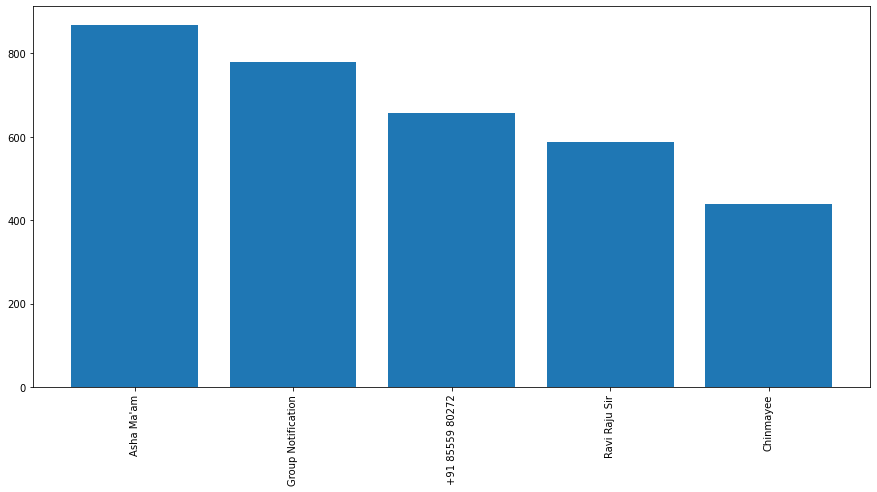

In [14]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [16]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'to': 1512,
 '<Media': 1393,
 'omitted>': 1393,
 'the': 786,
 'with': 715,
 'for': 606,
 'learn': 602,
 'code': 602,
 'Tap': 597,
 'Your': 595,
 'more.': 594,
 'security': 592,
 'changed.': 592,
 'This': 508,
 'join': 506,
 'message': 501,
 'deleted': 488,
 'are': 481,
 'was': 480,
 'and': 458,
 '+91': 376,
 'All': 375,
 'in': 373,
 'immediately': 337,
 'is': 316,
 'class': 298,
 'you': 268,
 'requested': 265,
 'sir': 264,
 'of': 254,
 'all': 214,
 'Dear': 200,
 'will': 196,
 'please': 194,
 'students': 191,
 'Please': 189,
 'your': 184,
 'Join': 182,
 'not': 180,
 'mam': 161,
 'u': 160,
 'this': 156,
 'on': 147,
 'have': 144,
 'by': 143,
 'as': 136,
 'I': 132,
 'it': 129,
 'ur': 129,
 'Guys': 128,
 '-': 124,
 'session': 123,
 'be': 122,
 'Good': 122,
 'Ok': 119,
 'from': 109,
 'Thank': 108,
 'training': 107,
 'we': 103,
 'who': 103,
 'register': 101,
 'registered': 100,
 'only': 93,
 'added': 91,
 'at': 90,
 'any': 88,
 'link': 84,
 'a': 83,
 'that': 82,
 'Sir': 81,
 'if': 78,
 'guys

In [17]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,to,1512
1,<Media,1393
2,omitted>,1393
3,the,786
4,with,715
5,for,606
6,learn,602
7,code,602
8,Tap,597
9,Your,595


In [ ]:
a,an,the,you,ok,...

In [15]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10
...,...,...,...,...,...,...,...,...,...,...,...
9198,12B1 - registration Completed sir,23/09/21 16:18,+91 79950 77079,2021-09-23,2021,9,September,23,Thursday,16,18
9199,1275 and 1288 do respond please ...done with r...,23/09/21 21:53,Asha Ma'am,2021-09-23,2021,9,September,23,Thursday,21,53
9200,75 registered mam,23/09/21 22:28,Manoj,2021-09-23,2021,9,September,23,Thursday,22,28
9201,+91 6304 605 703 left,24/09/21 08:01,Group Notification,2021-09-24,2021,9,September,24,Friday,8,1


In [18]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,<media,1393
1,omitted>,1393
2,join,689
3,learn,603
4,code,602
5,tap,597
6,more.,594
7,security,592
8,changed.,592
9,message,502


In [19]:
import emoji

In [20]:
def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji

,0,1
0,✋,183
1,🏻,88
2,😂,41
3,👍,39
4,👆,38
...,...,...
69,✨,1
70,🔝,1
71,🙌,1
72,🤟,1


In [21]:
dfmoji.columns = ['Emoji','Count']
dfmoji

,Emoji,Count
0,✋,183
1,🏻,88
2,😂,41
3,👍,39
4,👆,38
...,...,...
69,✨,1
70,🔝,1
71,🙌,1
72,🤟,1


In [22]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10


In [24]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

,Year,Month_num,Month,Message
0,2018,1,January,47
1,2018,2,February,35
2,2018,3,March,78
3,2018,4,April,66
4,2018,5,May,29
5,2018,6,June,25
6,2018,7,July,47
7,2018,8,August,520
8,2018,9,September,264
9,2018,10,October,208


In [16]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10


In [ ]:
1,2,2,3,4,4,4,5,6,7,3,4


1| 2 2 | 3 3| 4 4 4 4 | 5 | 6 | 7

{4 : 4, 3:2 , 2:2,} 

In [21]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2018,1,January,47
1,2018,2,February,35
2,2018,3,March,78
3,2018,4,April,66
4,2018,5,May,29
5,2018,6,June,25
6,2018,7,July,47
7,2018,8,August,520
8,2018,9,September,264
9,2018,10,October,208


In [31]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2018,1,January,47
1,2018,2,February,35
2,2018,3,March,78
3,2018,4,April,66
4,2018,5,May,29
5,2018,6,June,25
6,2018,7,July,47
7,2018,8,August,520
8,2018,9,September,264
9,2018,10,October,208


In [22]:
temp.shape

(48, 4)

In [25]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'January-2018'

In [26]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2018,1,January,47,January-2018
1,2018,2,February,35,February-2018
2,2018,3,March,78,March-2018
3,2018,4,April,66,April-2018
4,2018,5,May,29,May-2018
5,2018,6,June,25,June-2018
6,2018,7,July,47,July-2018
7,2018,8,August,520,August-2018
8,2018,9,September,264,September-2018
9,2018,10,October,208,October-2018


In [34]:
temp

,Year,Month_num,Month,Message,Time
0,2018,1,January,47,January-2018
1,2018,2,February,35,February-2018
2,2018,3,March,78,March-2018
3,2018,4,April,66,April-2018
4,2018,5,May,29,May-2018
5,2018,6,June,25,June-2018
6,2018,7,July,47,July-2018
7,2018,8,August,520,August-2018
8,2018,9,September,264,September-2018
9,2018,10,October,208,October-2018


In [27]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10


In [29]:
temp1 = df['Day_name'].value_counts()

In [33]:
temp1

Monday       1478
Tuesday      1406
Saturday     1373
Thursday     1350
Friday       1335
Wednesday    1280
Sunday        981
Name: Day_name, dtype: int64

In [31]:
list(temp1.index)

['Monday', 'Tuesday', 'Saturday', 'Thursday', 'Friday', 'Wednesday', 'Sunday']

In [32]:
list(temp1.values)

[1478, 1406, 1373, 1350, 1335, 1280, 981]

In [34]:
temp2 = df['Month'].value_counts()

In [35]:
temp2

August       1795
September    1147
April         982
May           750
July          701
March         648
January       615
October       610
June          544
November      533
December      496
February      382
Name: Month, dtype: int64

In [37]:
list(temp2.index),list(temp2.values)

(['August',
  'September',
  'April',
  'May',
  'July',
  'March',
  'January',
  'October',
  'June',
  'November',
  'December',
  'February'],
 [1795, 1147, 982, 750, 701, 648, 615, 610, 544, 533, 496, 382])